In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [20]:
signal = pd.read_csv('traffic_sum_node.csv', index_col=0) # read matrix of signals
G1 = nx.read_gml('/home/manuelherrera/Data/BT_data/graph_anonymous.gml')

G2 = G1.to_undirected()
#for c in nx.connected_components(G2):
#    G2.subgraph(c)
    
largest_cc = max(nx.connected_components(G2), key=len)

Gc = G2.subgraph(largest_cc) 
pos = nx.spring_layout(Gc) # layout by default that it is saved for future use

nnodes = len(Gc) # 222 nodes - 206 now
nedges = Gc.number_of_edges() # 730 edges - 722 now

node_names = list(Gc.nodes); link_names = list(Gc.edges)

# initializing substring 
subs = 'core-aln1'
node_names1 = [i for i in node_names if subs in i]

G = Gc.subgraph(node_names1)

pos = nx.spring_layout(G) # layout by default that it is saved for future use

# Fixing node classifications
G.nodes['core-aln1.tan-chachalaca']['nodeType'] = 'regional'
G.nodes['core-aln1.whimsical-angelfish']['nodeType'] = 'metro'

nodes_super = [x for x,y in G.nodes(data=True) if y['nodeType']=='super']
nodes_regional = [x for x,y in G.nodes(data=True) if y['nodeType']=='regional']
nodes_metro = [x for x,y in G.nodes(data=True) if y['nodeType']=='metro']
nodes_inner = [x for x,y in G.nodes(data=True) if y['nodeType']=='super' or y['nodeType']=='regional']
nodes_outer = [x for x,y in G.nodes(data=True) if y['nodeType']=='regional' or y['nodeType']=='metro']
df_inner = signal[nodes_inner]
df_outer = signal[nodes_outer]

In [21]:
Network2 = G.subgraph(nodes_inner)
remove = [node for node,degree in dict(Network2.degree()).items() if degree == 0]
Network = Network2.copy()
Network.remove_nodes_from(remove)

In [22]:
remove_list = []
for node in remove:
    if node in df_outer.columns:
        df_outer.drop(node, axis=1, inplace=True)
        
print("Number of columns:"); print(len(df_outer.columns)); print("Number of network nodes:"); print(len(Network))

Number of columns:
99
Number of network nodes:
13


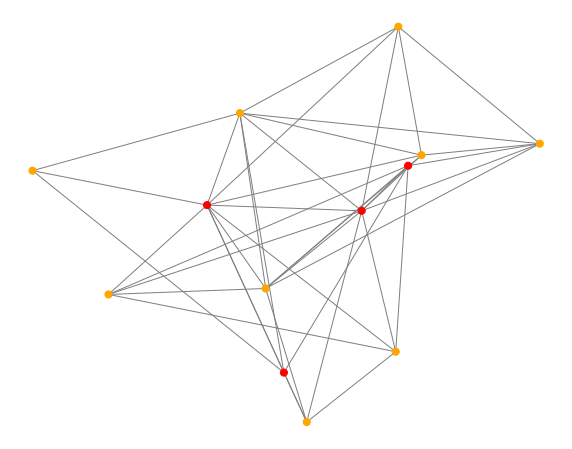

In [23]:
def color_map(Graph):
    color_map_n = []
    for i in Graph.nodes():
        if Graph.nodes[i]['nodeType'] == 'super':
            color_map_n.append('red')
        elif Graph.nodes[i]['nodeType'] == 'regional':
            color_map_n.append('orange')
        elif Graph.nodes[i]['nodeType'] == 'metro':
            color_map_n.append('green')
        else: color_map_n.append('blue')
    return color_map_n

color_map_n = color_map(Network)
f_outer = plt.figure(figsize=(10, 8))
plt.axis('off')
nx.draw_networkx(Network, pos, node_size=50, node_color = color_map_n, edge_color = "gray", with_labels=False)
plt.show()

In [9]:
degrees = [val for (node, val) in Network.degree()]

In [24]:
degrees = [val for (node, val) in Network.degree()]
sum(degrees) / Network.number_of_nodes() # average node degree, $d_G$,

6.3076923076923075

In [25]:
nx.average_shortest_path_length(Network) # average shortest path length, $l_G$,

1.4743589743589745

In [26]:
nx.global_efficiency(Network) # network efficiency, $E_G$,

0.7628205128205128

In [27]:
nx.average_clustering(Network) # clustering coefficient, $C_G$

0.6605616605616605

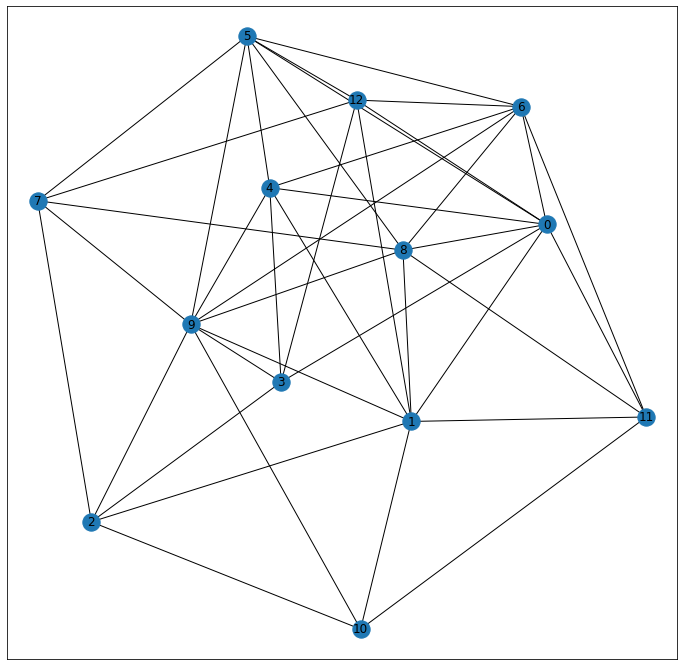

In [38]:
G = nx.erdos_renyi_graph(13,0.5)
  
plt.figure(figsize = (12, 12)) 
nx.draw_networkx(G)

In [52]:
degrees = [val for (node, val) in G.degree()]
print(sum(degrees) / G.number_of_nodes()) # average node degree, $d_G$,
print(nx.average_shortest_path_length(G)) # average shortest path length, $l_G$,
print(nx.global_efficiency(G)) # network efficiency, $E_G$,
print(nx.average_clustering(G)) # clustering coefficient, $C_G$

6.3076923076923075
1.4743589743589745
0.7628205128205128
0.5210622710622711


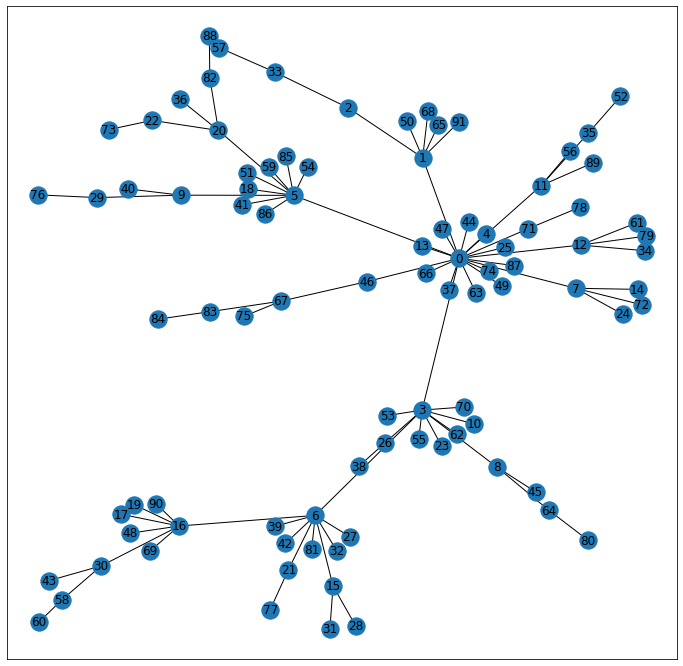

In [54]:
G2 = nx.barabasi_albert_graph(92,1)
plt.figure(figsize = (12, 12)) 
nx.draw_networkx(G2)

In [55]:
degrees = [val for (node, val) in G2.degree()]
print(sum(degrees) / G2.number_of_nodes()) # average node degree, $d_G$,
print(nx.average_shortest_path_length(G2)) # average shortest path length, $l_G$,
print(nx.global_efficiency(G2)) # network efficiency, $E_G$,
print(nx.average_clustering(G2)) # clustering coefficient, $C_G$

1.9782608695652173
4.329431438127091
0.2745507511811861
0.0


In [56]:
nodes_inner

['core-aln1.congenial-python',
 'core-aln1.pistachio-cheetah',
 'core-aln1.malachite-pheasant',
 'core-aln1.diamond-gopher',
 'core-aln1a.diamond-gopher',
 'core-aln1.celadon-aardwolf',
 'core-aln1.curvy-gopher',
 'core-aln1.slim-centipede',
 'core-aln1.sensible-cuttlefish',
 'core-aln1.tan-chachalaca',
 'core-aln1.swinging-alpaca',
 'core-aln1.stalwart-grouse',
 'core-aln1.marigold-curassow']